In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data Extraction

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples=200,n_features=2,centers=4 , cluster_std=1.8, random_state=101)

In [4]:
features = pd.DataFrame(data[0] ,columns=['x','y'])

In [5]:
target = pd.Series(data[1])

In [6]:
dataset = features.copy()

In [7]:
dataset['target'] = target

In [8]:
dataset.head()

,x,y,target
0,-6.428841,10.141117,3
1,5.868679,5.201104,2
2,-0.376109,3.264279,0
3,2.166792,9.563005,2
4,5.095086,7.207527,2


## EDA

In [9]:
sns.set_style('whitegrid')

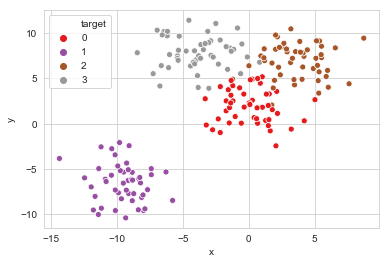

In [10]:
sns.scatterplot(data=dataset,x='x',y='y',hue='target' , palette='Set1')

## Modelling

In [11]:
from sklearn.cluster import KMeans

In [12]:
model = KMeans(n_clusters=4)

In [13]:
model.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
cluster_model = model.labels_

In [15]:
dataset_model = features.copy()

In [16]:
dataset_model['target'] = cluster_model

## Comparing the real data cluster, with model cluster

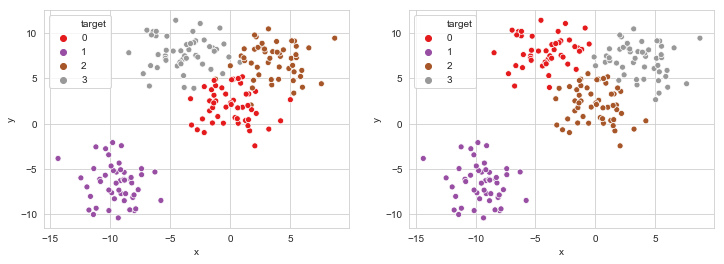

In [17]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
sns.scatterplot(data=dataset,x='x',y='y',hue='target',ax=ax[0] ,palette='Set1')
sns.scatterplot(data=dataset_model,x='x',y='y',hue='target',ax=ax[1] ,palette='Set1')

In [18]:
model.cluster_centers_

array([[-4.13591321,  7.95389851],
       [-9.46941837, -6.56081545],
       [-0.0123077 ,  2.13407664],
       [ 3.71749226,  7.01388735]])

## Find Best K

In [20]:
from yellowbrick.cluster import KElbowVisualizer

In [33]:
viz = KElbowVisualizer(KMeans() , k=(1,10))

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000029700B89B00>,
         k=None, locate_elbow=True, metric='distortion', model=None,
         timings=True)

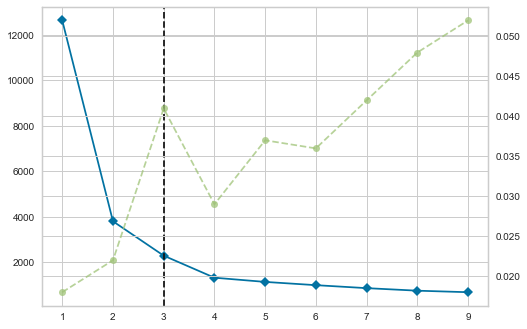

In [34]:
viz.fit(features)

## Clustering With Best K

In [24]:
model_k_3 = KMeans(n_clusters=3)

In [25]:
model_k_3.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [36]:
dataset_model_k_3 = features.copy()

In [37]:
dataset_model_k_3['target'] = model_k_3.labels_

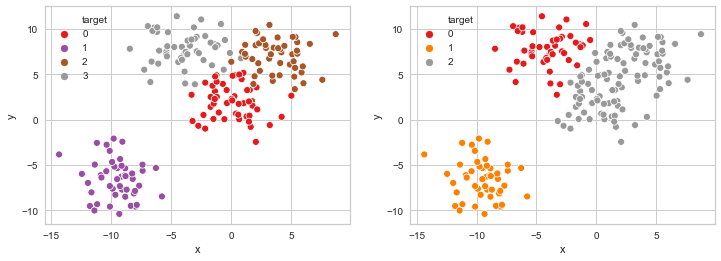

In [38]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
sns.scatterplot(data=dataset,x='x',y='y',hue='target',ax=ax[0] ,palette='Set1')
sns.scatterplot(data=dataset_model_k_3,x='x',y='y',hue='target',ax=ax[1] ,palette='Set1')